# Proyecto 1 - Tercer corte

## Laura Alejandra Palomino Camacho
## Lady Tatiana Aguillón Suárez

# Importación, carga y exploración inicial


### Importación y carga

In [93]:
!pip install catboost
!pip install wooldridge
import wooldridge as wd
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [94]:
dataset = pd.read_csv('/content/marketing_campaign.csv', sep = "\t")
dataset

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


### Exploración inicial



In [95]:
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [96]:
dataset.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [97]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [98]:
dataset.tail()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,...,7,0,0,0,0,0,0,3,11,1


In [99]:
dataset = dataset.drop(columns=['ID'])

###Conclusión
Esta base de datos habla principalmente de los hábitos de consumo de las familias y para esto es importante conocer aspectos como el salario, el número de miembros en el hogar, y la cantidad de productos que compran tratando de determinar si existe una relación significativa entre las variables.


### Exploración univariada de los datos

<Axes: >

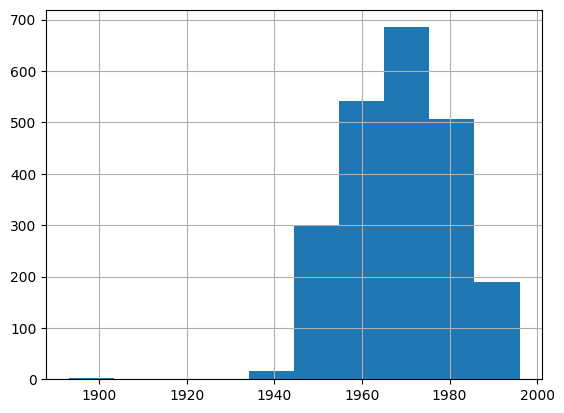

In [100]:
dataset['Year_Birth'].hist()

<Axes: >

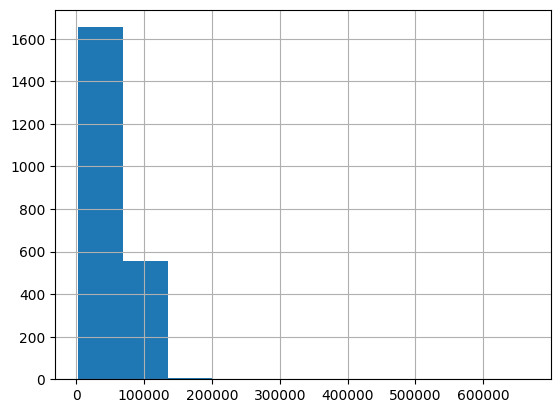

In [101]:
dataset['Income'].hist()

<Axes: >

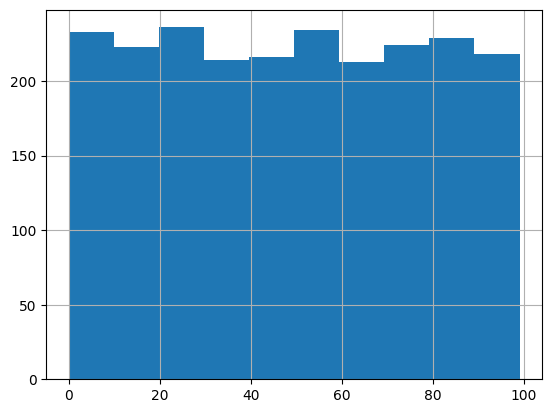

In [102]:
dataset['Recency'].hist()

<Axes: >

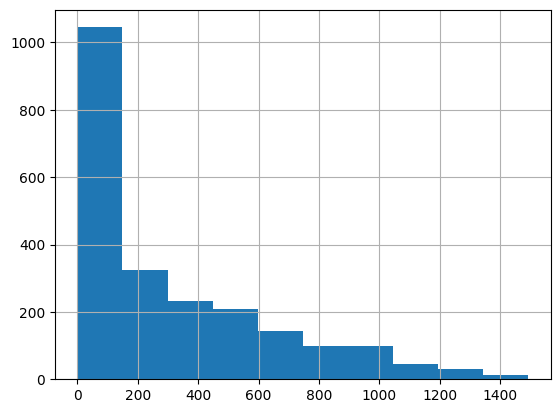

In [103]:
dataset['MntWines'].hist()

<Axes: >

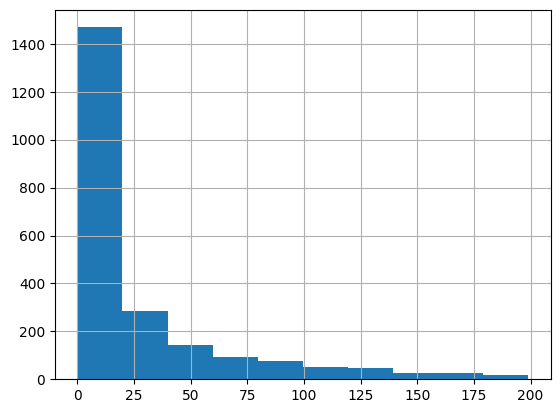

In [104]:
dataset['MntFruits'].hist()

<Axes: >

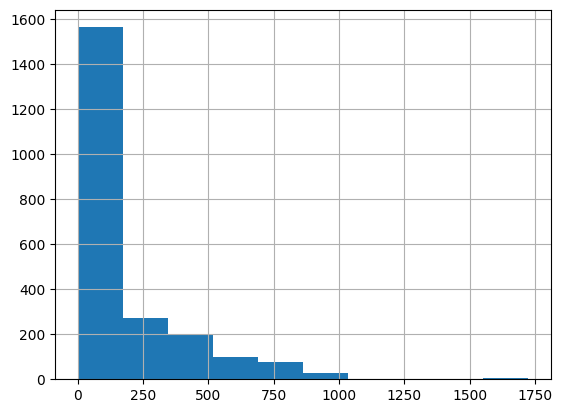

In [105]:
dataset['MntMeatProducts'].hist()

<Axes: >

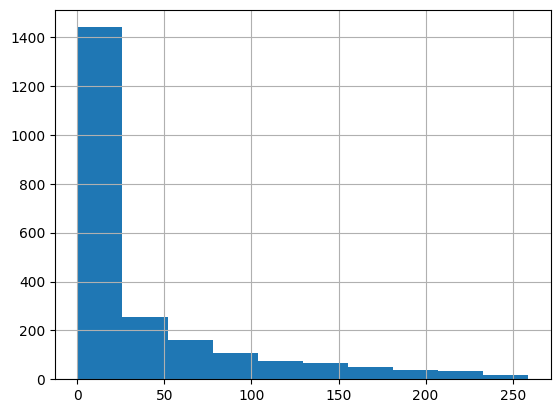

In [106]:
dataset['MntFishProducts'].hist()

<Axes: >

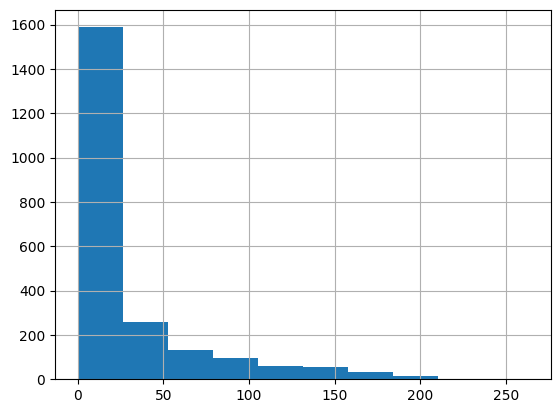

In [107]:
dataset['MntSweetProducts'].hist()

<Axes: >

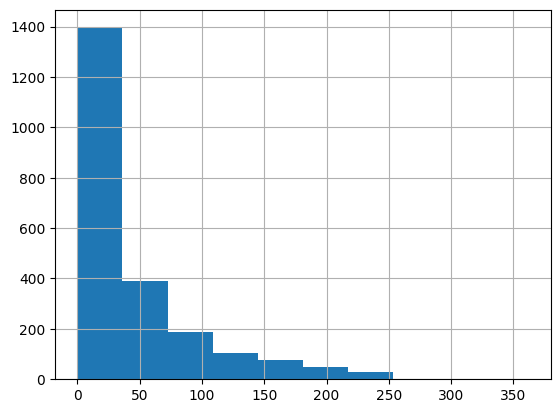

In [108]:
dataset['MntGoldProds'].hist()

<Axes: >

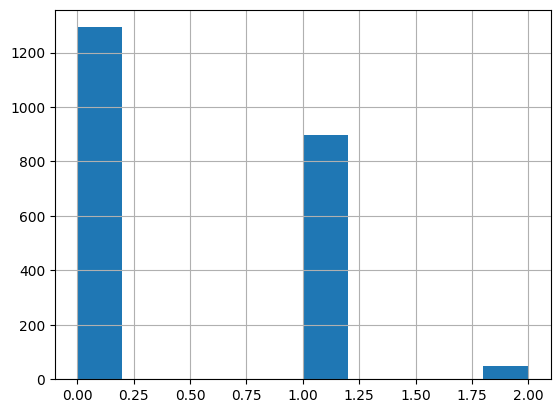

In [109]:
dataset['Kidhome'].hist()

<Axes: >

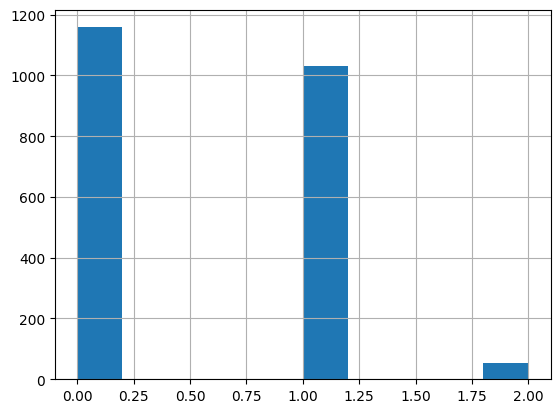

In [110]:
dataset['Teenhome'].hist()

<Axes: >

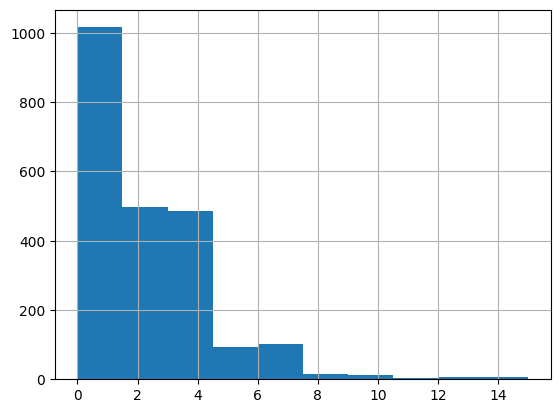

In [111]:
dataset['NumDealsPurchases'].hist()

<Axes: >

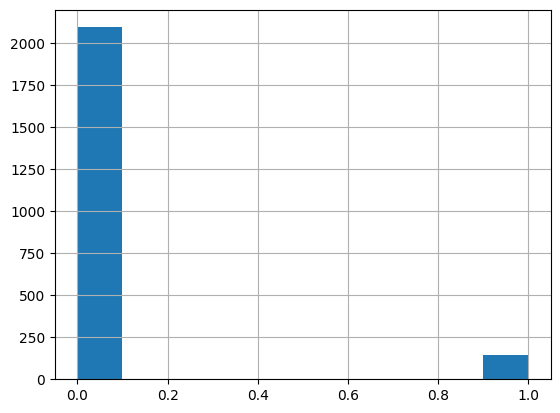

In [112]:
dataset['AcceptedCmp1'].hist()

<Axes: >

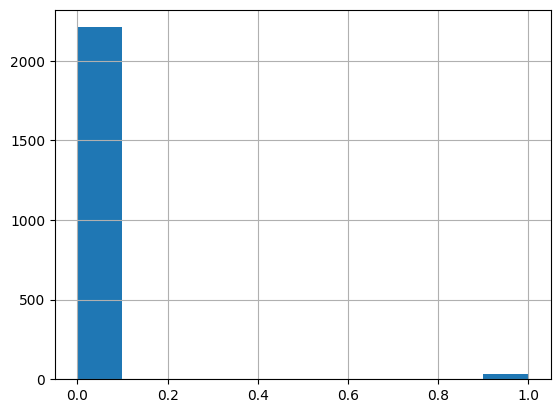

In [113]:
dataset['AcceptedCmp2'].hist()

<Axes: >

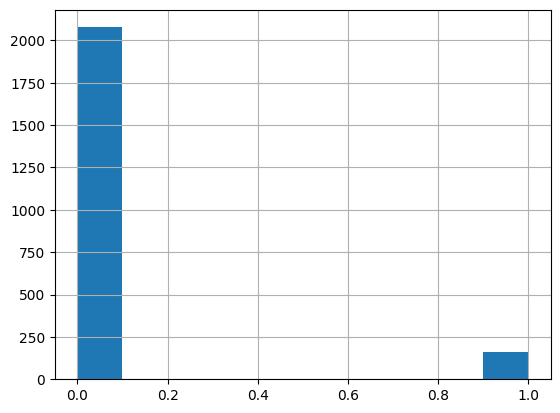

In [114]:
dataset['AcceptedCmp3'].hist()

<Axes: >

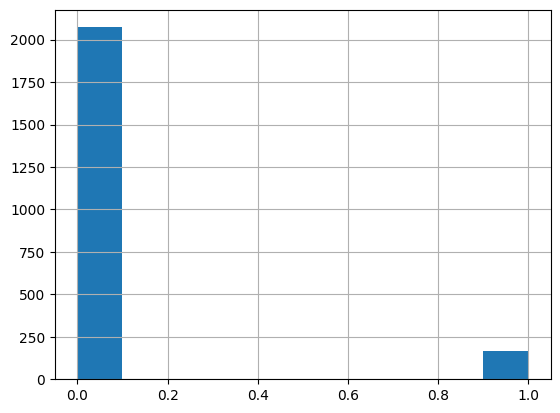

In [115]:
dataset['AcceptedCmp4'].hist()

<Axes: >

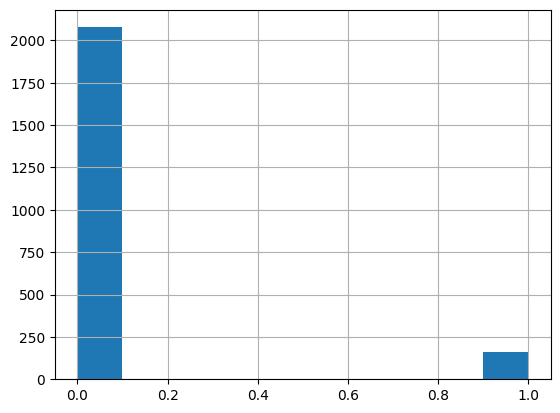

In [116]:
dataset['AcceptedCmp5'].hist()

<Axes: >

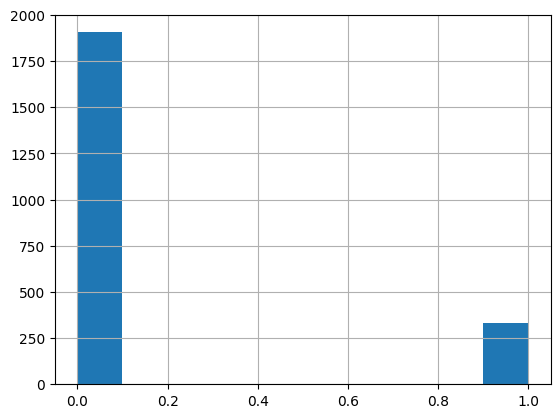

In [117]:
dataset['Response'].hist()

<Axes: >

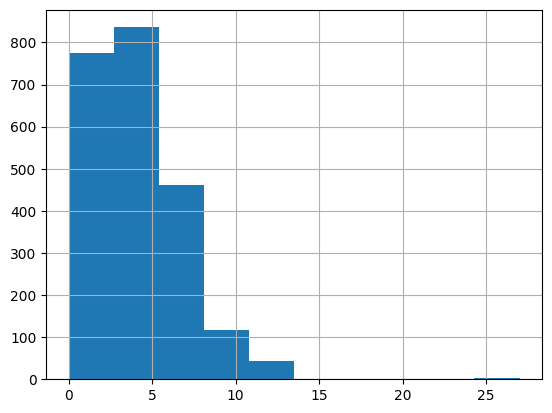

In [118]:
dataset['NumWebPurchases'].hist()

<Axes: >

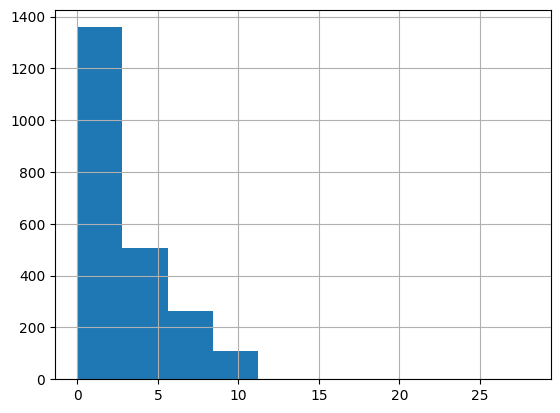

In [119]:
dataset['NumCatalogPurchases'].hist()

<Axes: >

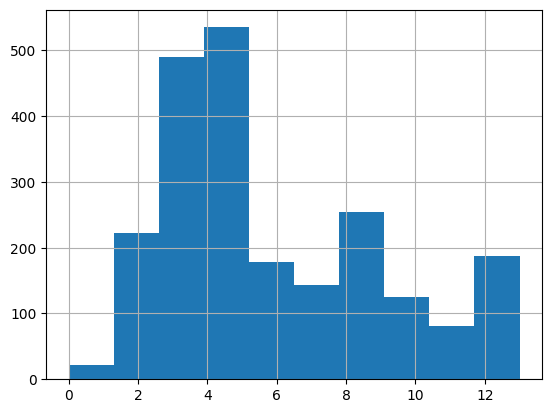

In [120]:
dataset['NumStorePurchases'].hist()

<Axes: >

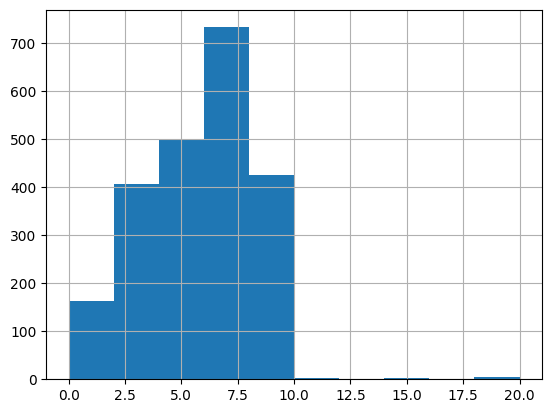

In [121]:
dataset['NumWebVisitsMonth'].hist()

<Axes: >

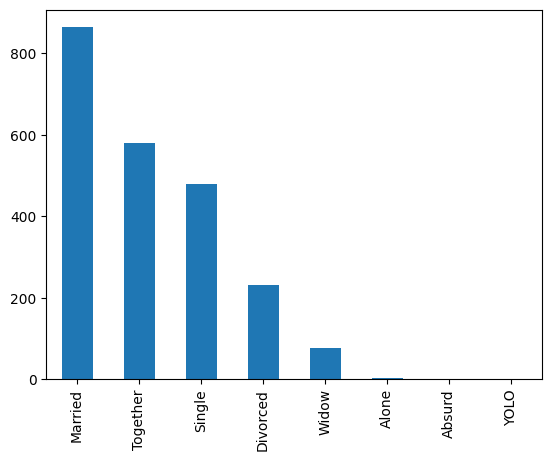

In [122]:
dataset['Marital_Status'].value_counts().plot(kind='bar')

<Axes: >

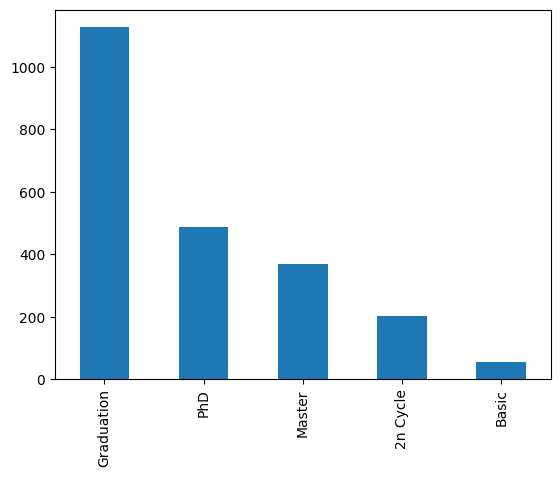

In [123]:
dataset['Education'].value_counts().plot(kind='bar')

###Conclusión
Partiendo de los histogramas y digramas de barras de barras se puede decir que la mayoría de personas nacieron entre 1960 y 1980, Adicional a esto qué hay personas gran cantidad de personas que destinan gran parte de sus ingresos a la compra de frutas y otros productos. La mayoría de personas tiene como estado civil casado y que la mayoría de personas son graduadas

### Correlación de variables

In [124]:
datasetcor= dataset.corr()
datasetcor

<ipython-input-124-ce49763c778c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  datasetcor= dataset.corr()


,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
Year_Birth,1.000000,-0.161791,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,-0.041625,-0.018133,...,0.121139,0.061774,-0.060510,0.007123,-0.005930,-0.006539,-0.030128,NaN,NaN,0.021325
Income,-0.161791,1.000000,-0.428669,0.019133,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,...,-0.553088,-0.016174,0.184400,0.335943,0.276820,0.087545,-0.027225,NaN,NaN,0.133047
Kidhome,0.230176,-0.428669,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,-0.387644,-0.370673,...,0.447846,0.014674,-0.161600,-0.205634,-0.172339,-0.081716,0.040207,NaN,NaN,-0.080008
Teenhome,-0.352111,0.019133,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,-0.204187,-0.162475,...,0.134884,-0.042677,0.038886,-0.191050,-0.140090,-0.015605,0.003138,NaN,NaN,-0.154446
Recency,-0.019871,-0.003970,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,0.001079,0.022670,...,-0.021445,-0.032991,0.018826,0.000129,-0.019283,-0.001781,0.013231,NaN,NaN,-0.198437
MntWines,-0.157773,0.578650,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,0.399753,0.386581,...,-0.320653,0.062202,0.373286,0.472613,0.354133,0.205907,-0.039007,NaN,NaN,0.247254
MntFruits,-0.017917,0.430842,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,0.594804,0.567164,...,-0.418383,0.014727,0.010152,0.215833,0.194748,-0.009773,-0.005166,NaN,NaN,0.125289
MntMeatProducts,-0.030872,0.584633,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,0.568402,0.523846,...,-0.539470,0.018272,0.102912,0.373769,0.309761,0.043033,-0.023483,NaN,NaN,0.236335
MntFishProducts,-0.041625,0.438871,-0.387644,-0.204187,0.001079,0.399753,0.594804,0.568402,1.000000,0.579870,...,-0.446003,0.000357,0.016843,0.199578,0.260762,0.002577,-0.020953,NaN,NaN,0.111331
MntSweetProducts,-0.018133,0.440744,-0.370673,-0.162475,0.022670,0.386581,0.567164,0.523846,0.579870,1.000000,...,-0.423294,0.001530,0.028641,0.259590,0.241818,0.009985,-0.022485,NaN,NaN,0.117372


<Axes: >

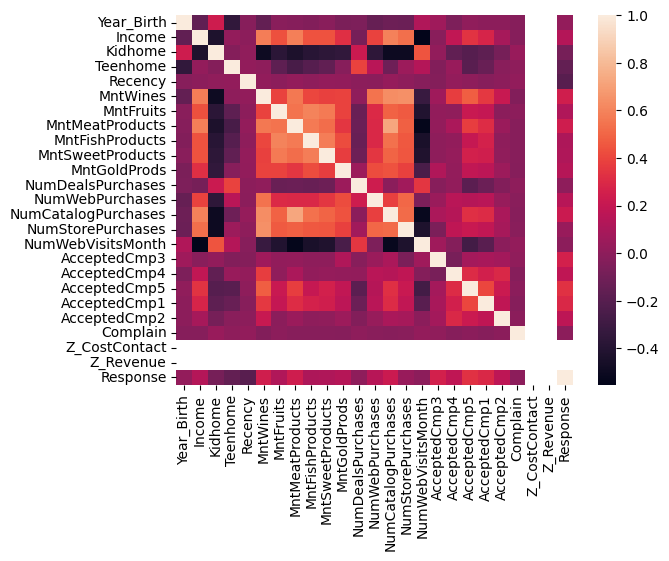

In [125]:
import seaborn as sns
sns.heatmap(datasetcor)

## Conclusión 
Se puede observar una correlación negativa entre las variables Kidhome y la variable income con un valor de -0,42 donde entre mas niños en el hogar se ven reducidos los ingresos del hogar, es decir se relacionan de manera inversa. 
Así mismo se puede encontrar una relación directamente proporcional entre la variable Income y las variables MntWines, Mntfruits, MntMeat, MntFish, Mntsweet, Mntgold ya que a mayor ingreso se pueden comparar una mayor cantidad de productos



# Enriquecimiento de los datos

In [126]:
import numpy as np
from datetime import datetime
datetime.today()

datetime.datetime(2023, 5, 24, 2, 29, 51, 771618)

In [127]:
dataset['year'] = 2023- dataset['Year_Birth']
dataset.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,year
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,0,0,3,11,1,66
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,0,0,3,11,0,69
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,0,3,11,0,58
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,0,0,3,11,0,39
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,0,3,11,0,42


In [128]:
dataset['MntTotal'] =dataset['MntWines']+dataset['MntFruits']+dataset['MntMeatProducts']+dataset['MntFishProducts']+dataset['MntSweetProducts']+dataset['MntGoldProds']
dataset.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,year,MntTotal
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,0,3,11,1,66,1617
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,0,3,11,0,69,27
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,3,11,0,58,776
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,0,3,11,0,39,53
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,3,11,0,42,422


In [129]:
dataset['AcceptedTotal'] =dataset['AcceptedCmp1']+dataset['AcceptedCmp2']+dataset['AcceptedCmp3']+dataset['AcceptedCmp4']+dataset['AcceptedCmp5']+dataset['Response']
dataset
dataset = dataset.drop(columns=['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response'])
dataset

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,year,MntTotal,AcceptedTotal
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,8,10,4,7,0,3,11,66,1617,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,1,2,5,0,3,11,69,27,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,8,2,10,4,0,3,11,58,776,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,2,0,4,6,0,3,11,39,53,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,3,6,5,0,3,11,42,422,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,9,3,4,5,0,3,11,56,1341,0
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,8,2,5,7,0,3,11,77,444,1
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,2,3,13,6,0,3,11,42,1241,1
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,6,5,10,3,0,3,11,67,843,0


In [130]:
dataset['Numpurchases'] =dataset['NumWebPurchases']+dataset['NumCatalogPurchases']+dataset['NumStorePurchases']
dataset

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,year,MntTotal,AcceptedTotal,Numpurchases
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,10,4,7,0,3,11,66,1617,1,22
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,1,2,5,0,3,11,69,27,0,4
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,2,10,4,0,3,11,58,776,0,20
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,0,4,6,0,3,11,39,53,0,6
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,3,6,5,0,3,11,42,422,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,3,4,5,0,3,11,56,1341,0,16
2236,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,2,5,7,0,3,11,77,444,1,15
2237,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,3,13,6,0,3,11,42,1241,1,18
2238,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,5,10,3,0,3,11,67,843,0,21


# Análisis de componentes principales

In [131]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

In [132]:
dataset2 = dataset.drop(columns=['Year_Birth','Education','Marital_Status','Dt_Customer','Recency','Complain'])
dataset2 = dataset2.dropna()
dataset2

,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,year,MntTotal,AcceptedTotal,Numpurchases
0,58138.0,0,0,635,88,546,172,88,88,3,8,10,4,7,3,11,66,1617,1,22
1,46344.0,1,1,11,1,6,2,1,6,2,1,1,2,5,3,11,69,27,0,4
2,71613.0,0,0,426,49,127,111,21,42,1,8,2,10,4,3,11,58,776,0,20
3,26646.0,1,0,11,4,20,10,3,5,2,2,0,4,6,3,11,39,53,0,6
4,58293.0,1,0,173,43,118,46,27,15,5,5,3,6,5,3,11,42,422,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,709,43,182,42,118,247,2,9,3,4,5,3,11,56,1341,0,16
2236,64014.0,2,1,406,0,30,0,0,8,7,8,2,5,7,3,11,77,444,1,15
2237,56981.0,0,0,908,48,217,32,12,24,1,2,3,13,6,3,11,42,1241,1,18
2238,69245.0,0,1,428,30,214,80,30,61,2,6,5,10,3,3,11,67,843,0,21


In [133]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scal = scaler.fit_transform(dataset2)
pca = PCA()
data_pca = pca.fit_transform(data_scal)
pca.explained_variance_ratio_

array([4.40124774e-01, 1.13564914e-01, 7.13588008e-02, 6.16371108e-02,
       4.34031139e-02, 4.14274258e-02, 3.50342019e-02, 3.15984881e-02,
       2.68175552e-02, 2.44353522e-02, 2.34788891e-02, 2.17711989e-02,
       2.01549498e-02, 1.79813332e-02, 1.43446394e-02, 1.28672527e-02,
       1.38283605e-32, 1.27095399e-33, 2.84570577e-35, 4.14248548e-38])

In [134]:
data_pca = PCA(n_components=7)
pcatrans = pca.fit_transform(data_scal)
datacluster = pd.DataFrame(pcatrans)

###Conclusión

Lo que se hizo inicialmente fue eliminar algunas columnas para luego si crear una nueva base de datos para luego realizar el análisis de los componentes principales que luego se estandarizaron los datos.

# Clusterización

In [135]:
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans

db_scores = []
for i in range(2, 20):

  km = KMeans(n_clusters=i,
    init='random',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0).fit(datacluster)
  score = davies_bouldin_score(datacluster, km.labels_)
  db_scores.append(score)

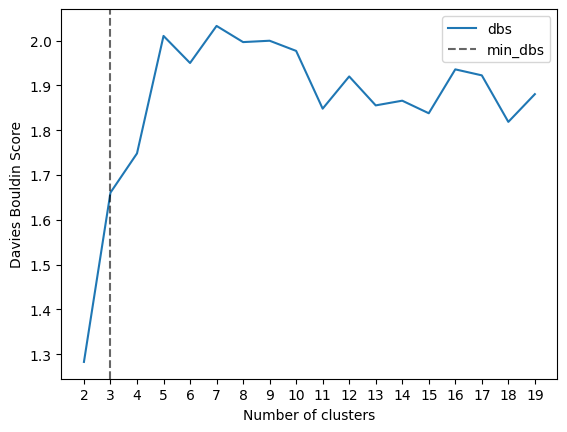

In [136]:
plt.plot(range(2, 20), db_scores, label='dbs')
plt.axvline(3, ls='--', color='k', label='min_dbs', alpha=0.6)
plt.xticks(range(2, 20))
plt.xlabel("Number of clusters")
plt.ylabel("Davies Bouldin Score")
plt.legend()
plt.show()

### Análisis de clústers

In [137]:
kmc = KMeans(n_clusters=2,
    init='random',
    n_init=10,
    max_iter=300,
    tol=1e-04,
    random_state=0).fit(datacluster)
dataset2['Labels'] = kmc.labels_
dataset2

,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,year,MntTotal,AcceptedTotal,Numpurchases,Labels
0,58138.0,0,0,635,88,546,172,88,88,3,...,10,4,7,3,11,66,1617,1,22,0
1,46344.0,1,1,11,1,6,2,1,6,2,...,1,2,5,3,11,69,27,0,4,1
2,71613.0,0,0,426,49,127,111,21,42,1,...,2,10,4,3,11,58,776,0,20,0
3,26646.0,1,0,11,4,20,10,3,5,2,...,0,4,6,3,11,39,53,0,6,1
4,58293.0,1,0,173,43,118,46,27,15,5,...,3,6,5,3,11,42,422,0,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,61223.0,0,1,709,43,182,42,118,247,2,...,3,4,5,3,11,56,1341,0,16,0
2236,64014.0,2,1,406,0,30,0,0,8,7,...,2,5,7,3,11,77,444,1,15,1
2237,56981.0,0,0,908,48,217,32,12,24,1,...,3,13,6,3,11,42,1241,1,18,0
2238,69245.0,0,1,428,30,214,80,30,61,2,...,5,10,3,3,11,67,843,0,21,0


<Axes: title={'center': 'Income'}, xlabel='Labels'>

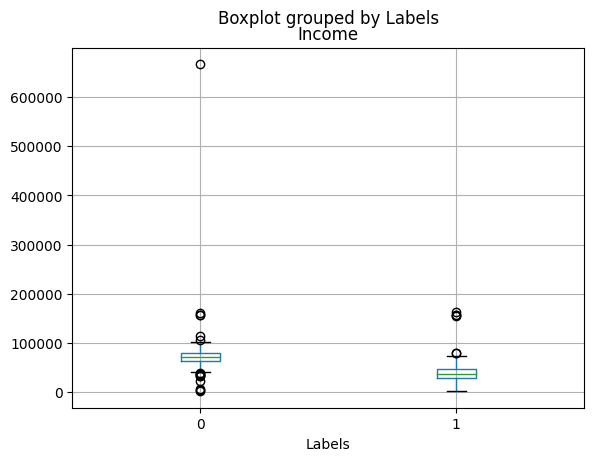

In [138]:
dataset2.boxplot(column='Income', by='Labels')

<Axes: title={'center': 'MntWines'}, xlabel='Labels'>

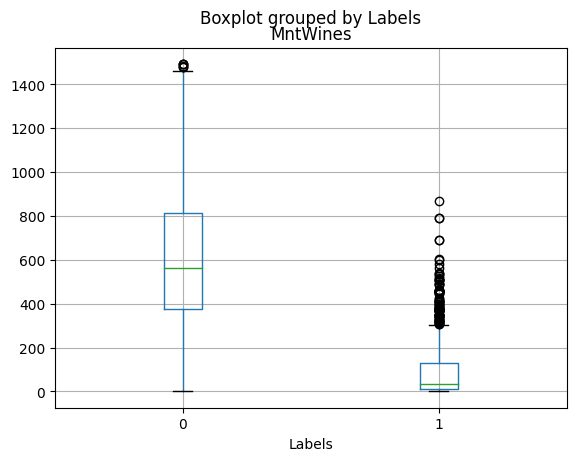

In [139]:
dataset2.boxplot(column='MntWines', by='Labels')

<Axes: title={'center': 'MntFruits'}, xlabel='Labels'>

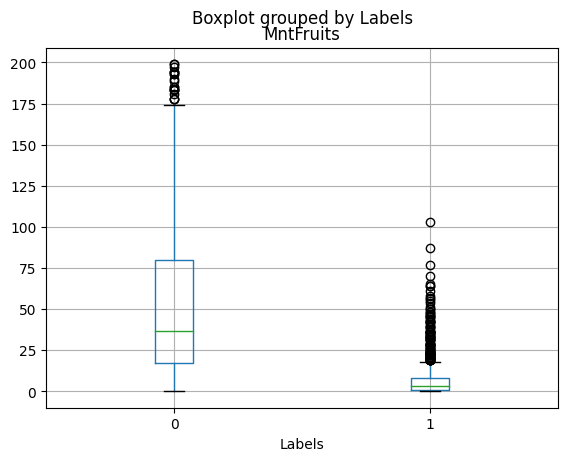

In [140]:
dataset2.boxplot(column='MntFruits', by='Labels')

<Axes: title={'center': 'MntMeatProducts'}, xlabel='Labels'>

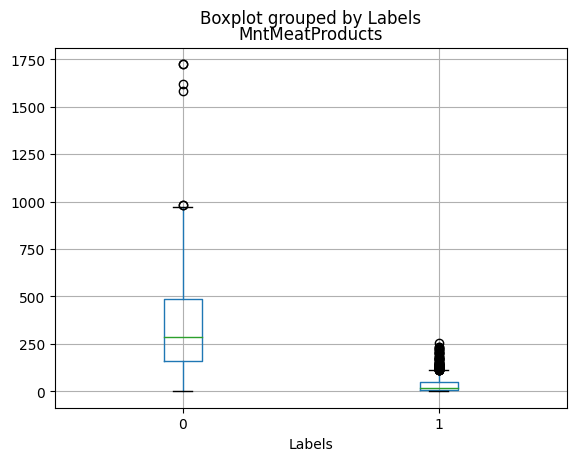

In [141]:
dataset2.boxplot(column='MntMeatProducts', by='Labels')

<Axes: title={'center': 'MntFishProducts'}, xlabel='Labels'>

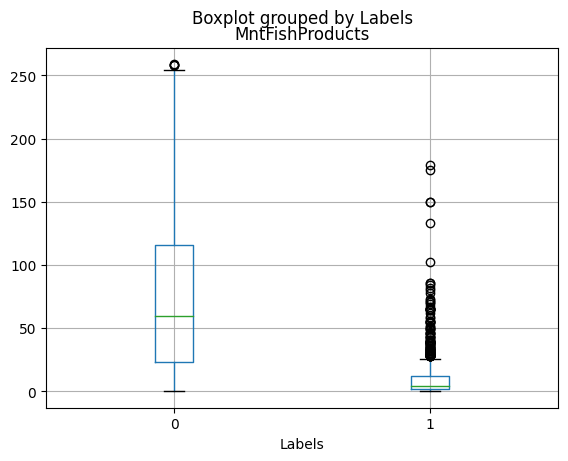

In [142]:
dataset2.boxplot(column='MntFishProducts', by='Labels')

<Axes: title={'center': 'MntSweetProducts'}, xlabel='Labels'>

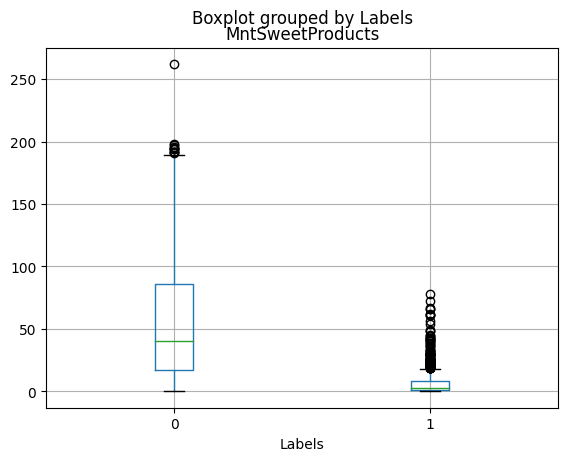

In [143]:
dataset2.boxplot(column='MntSweetProducts', by='Labels')

<Axes: title={'center': 'MntGoldProds'}, xlabel='Labels'>

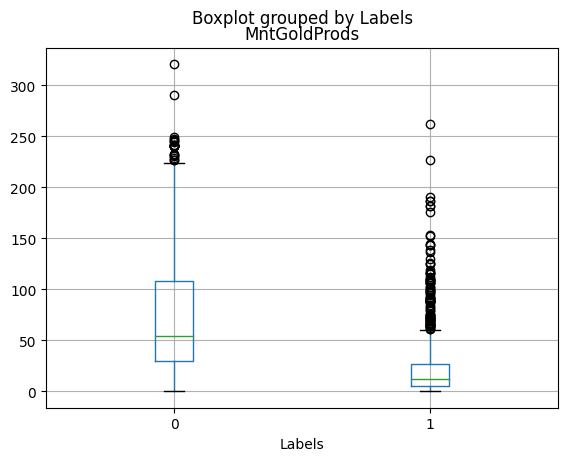

In [144]:
dataset2.boxplot(column='MntGoldProds', by='Labels')

<Axes: xlabel='Labels'>

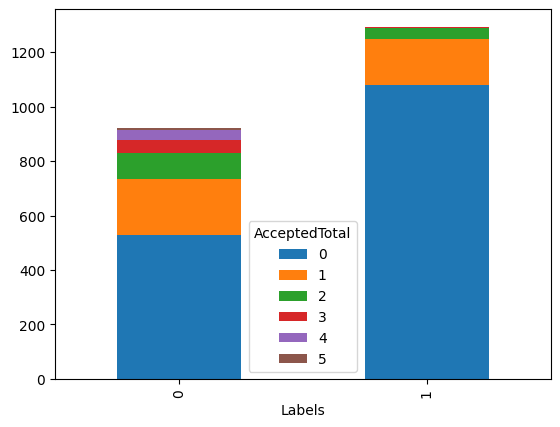

In [145]:
dataset2[['Labels','AcceptedTotal']].value_counts().reset_index().pivot_table(columns=['AcceptedTotal'], 
                     index='Labels',values=0).plot.bar(stacked=True)

<Axes: xlabel='Labels'>

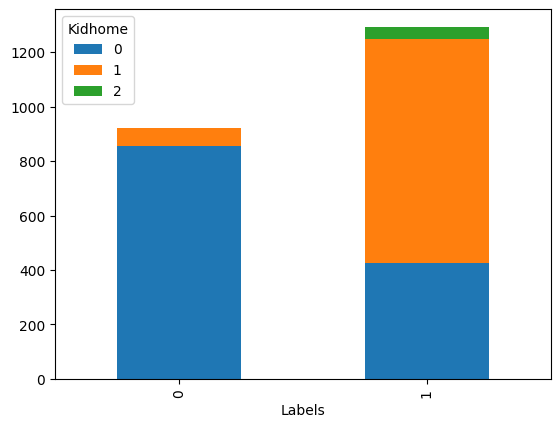

In [146]:
dataset2[['Labels','Kidhome']].value_counts().reset_index().pivot_table(columns=['Kidhome'], 
                     index='Labels',values=0).plot.bar(stacked=True)

<Axes: xlabel='Labels'>

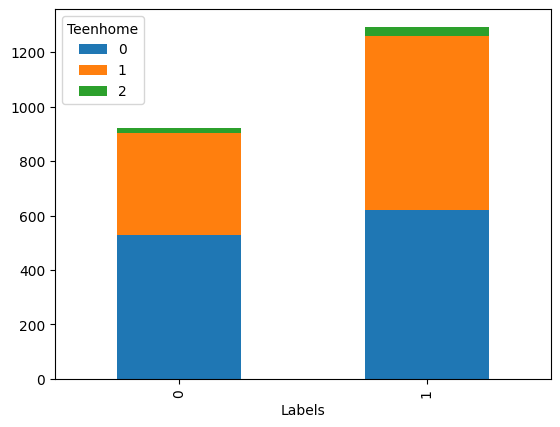

In [147]:
dataset2[['Labels','Teenhome']].value_counts().reset_index().pivot_table(columns=['Teenhome'], 
                     index='Labels',values=0).plot.bar(stacked=True)

### Conclusión
A partir de la grafica se puede observar que el numero clusters no es demasiado alto ya que se encuentra en 2 clusters segun la linea puntada, con esto se puede decir que la mejor opción en la variable Icome es el cluster número 1 ya que se puede observar un mayor ingreso en los hogares y una mayor distribución de los datos, para la variable MntWines donde el primer cluster tiene una mejor distribución de los datos.
Se puede observar que la mayor cantidad de niños en casa se encuentra ente 0 y 1 un niños por cada hogar
